In [1]:
import torch
import os
import struct
import matplotlib.pyplot as plt
import numpy as np
# import torchvision
# from torchvision import datasets
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
import copy


In [2]:
import numpy as np
def read_all_images(path_to_data):
   """
   :param path_to_data: the file containing the binary images from the STL-10 dataset
   :return: an array containing all the images
   """

   with open(path_to_data, 'rb') as f:
       # read whole file in uint8 chunks
       everything = np.fromfile(f, dtype=np.uint8)

       images = np.reshape(everything, (-1, 3, 96, 96))
       

       images = np.transpose(images, (0, 3, 2, 1))
       images =  np.dot(images[:,:,:,0:3],[0.299,0.587,0.114])
       print(images.shape)
       images = np.reshape(images, (len(images), 96*96))
       return images
                          

In [3]:
import os

images = read_all_images(os.getcwd()+"/data/stl10_binary/train_X.bin")
print (images.shape)

(5000, 96, 96)
(5000, 9216)


In [5]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(96*96, 96*48),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(96*48,96*96))

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [6]:
model = autoencoder().cuda()
criterion = nn.MSELoss()
num_epochs = 100
batch_size = 100
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-5)

lo=[]
ep=[]
for epoch in range(num_epochs):
    ep.append(epoch+1)
    for i in range(0,5000, batch_size):
        batch_x = images[i:i+batch_size]
        batch_x = Variable(torch.cuda.FloatTensor(batch_x))
        
        output = model(batch_x)
        loss = criterion(output, batch_x)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.data[0]))
    lo.append(loss.data[0])
    

/home/mohit1_aml/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/home/mohit1_aml/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch [1/100], loss:2181.2219
epoch [2/100], loss:1697.6442
epoch [3/100], loss:1457.1357
epoch [4/100], loss:1300.1011
epoch [5/100], loss:1199.0592
epoch [6/100], loss:1149.6067
epoch [7/100], loss:1066.8799
epoch [8/100], loss:1018.0823
epoch [9/100], loss:965.7773
epoch [10/100], loss:925.1290
epoch [11/100], loss:890.7554
epoch [12/100], loss:876.9622
epoch [13/100], loss:839.2620
epoch [14/100], loss:808.1233
epoch [15/100], loss:786.3724
epoch [16/100], loss:764.8719
epoch [17/100], loss:743.9722
epoch [18/100], loss:726.1940
epoch [19/100], loss:712.4441
epoch [20/100], loss:713.1728
epoch [21/100], loss:684.4672
epoch [22/100], loss:667.0001
epoch [23/100], loss:653.1171
epoch [24/100], loss:642.7803
epoch [25/100], loss:649.5156
epoch [26/100], loss:632.7924
epoch [27/100], loss:613.4673
epoch [28/100], loss:603.2015
epoch [29/100], loss:604.3420
epoch [30/100], loss:582.0856
epoch [31/100], loss:578.3055
epoch [32/100], loss:569.4445
epoch [33/100], loss:563.5696
epoch [34/1

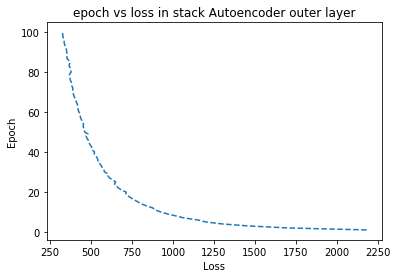

In [8]:
plt.plot(lo,ep,linestyle='dashed')
### plot ROC
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.title('epoch vs loss in stack Autoencoder outer layer')
plt.show()

In [9]:
torch.save(model, "./model.pth")

features = model.encoder(Variable(torch.cuda.FloatTensor(images)))

class Autoencoder2(nn.Module):
  def __init__(self):
        super(Autoencoder2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(96*48, 48*48),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(48*48,96*48))

  def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model_inner = Autoencoder2().cuda()
criterian = nn.MSELoss()
num_epochs = 100
batch_size = 500
learning_rate = 0.0001
optimizer = optim.Adam(model_inner.parameters(), lr = learning_rate)

/home/mohit1_aml/anaconda3/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type autoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [10]:
ep=[]
lo=[]
for epoch in range(num_epochs):
    ep.append(epoch)
    for i in range(0,5000, batch_size):
        batch_x = features[i:i+500]
        batch_x = Variable(torch.cuda.FloatTensor(batch_x))
        output = model_inner(batch_x)
        loss = criterion(output, batch_x)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.data[0]))
    lo.append(loss.data[0])

/home/mohit1_aml/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  from ipykernel import kernelapp as app
/home/mohit1_aml/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


epoch [1/100], loss:4696.8916
epoch [2/100], loss:3144.8286
epoch [3/100], loss:2670.1614
epoch [4/100], loss:2557.1626
epoch [5/100], loss:2477.8770
epoch [6/100], loss:2414.9617
epoch [7/100], loss:2342.8113
epoch [8/100], loss:2257.4248
epoch [9/100], loss:2168.7136
epoch [10/100], loss:2087.8787
epoch [11/100], loss:2018.9222
epoch [12/100], loss:1958.8469
epoch [13/100], loss:1903.4946
epoch [14/100], loss:1850.5051
epoch [15/100], loss:1799.0846
epoch [16/100], loss:1749.6495
epoch [17/100], loss:1702.6866
epoch [18/100], loss:1658.4541
epoch [19/100], loss:1616.9751
epoch [20/100], loss:1578.1187
epoch [21/100], loss:1541.6487
epoch [22/100], loss:1507.1257
epoch [23/100], loss:1474.5498
epoch [24/100], loss:1443.6860
epoch [25/100], loss:1414.3856
epoch [26/100], loss:1386.4688
epoch [27/100], loss:1359.8790
epoch [28/100], loss:1334.4948
epoch [29/100], loss:1310.2206
epoch [30/100], loss:1287.0267
epoch [31/100], loss:1264.8496
epoch [32/100], loss:1243.5807
epoch [33/100], l

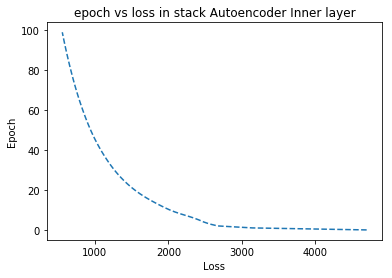

In [11]:
plt.plot(lo,ep,linestyle='dashed')
### plot ROC
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.title('epoch vs loss in stack Autoencoder Inner layer')
plt.show()

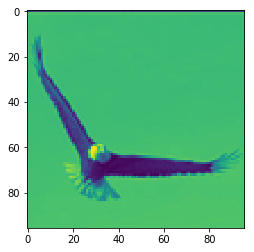

In [16]:
import matplotlib.pyplot as plt
plt.imshow(images[40].reshape(96,96), interpolation='none')
# model1 = torch.load("./funn_autoencoder.pth")

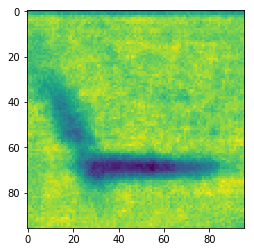

In [17]:
images_reconstructed = model.encoder(Variable(torch.cuda.FloatTensor(images)))
images_reconstructed = model_inner.encoder(images_reconstructed)
images_reconstructed = model_inner.decoder(images_reconstructed)
images_reconstructed = model.decoder(images_reconstructed)
plt.imshow(images_reconstructed[40].cpu().detach().numpy().reshape(96,96), interpolation='none')

In [35]:
# model = torch.save(model,"./model_best.pth")
#model_inner = torch.save(model_inner,"./model_inner_best.pth")
sample_feature_rep = model_inner.encoder(features)
# print (model)
# features = model.encoder(Variable(torch.FloatTensor(images)))


In [31]:
def read_all_labels(path_to_data):
   """
   :param path_to_data: the file containing the binary images from the STL-10 dataset
   :return: an array containing all the images
   """

   with open(path_to_data, 'rb') as f:
       # read whole file in uint8 chunks
       everything = np.fromfile(f, dtype=np.uint8)

       return everything


label = read_all_labels(os.getcwd()+"/data/stl10_binary/train_y.bin")
epochs = 100
label_oh = np.zeros((label.size,label.max()))
label_oh[np.arange(5000),label-1]=1
label=label-1

In [1]:
class NN(nn.Module):
  def __init__(self,input_size, hidden_size1,hidden_size2, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size2, num_classes)
        
        

  def forward(self, x):
        
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.output(out)
        
        return out
  

NeuralNet = NN(48*48,48*24, 24*24,10).cuda()
criterion_net = nn.CrossEntropyLoss()
learning_rate=0.001
optimizer_net = torch.optim.Adam(NeuralNet.parameters(), lr=learning_rate)

NameError: name 'nn' is not defined

In [45]:
# sample_rep_matrix = sample_rep_matrix
for epoch in range(num_epochs):
    for i in range(0,5000,100):
        batch_x = sample_feature_rep[i:i+100]
        output = NeuralNet(batch_x)
        output = output.cpu().detach().numpy()
        output = output
        output = Variable(torch.cuda.FloatTensor(output),requires_grad=True)
        label_batch = label_oh[i:i+100]
        label_batch = Variable(torch.cuda.FloatTensor(label_batch))
        loss = criterion(output,label_batch)
        print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
    print (loss.data[0], "  in epoch  ", epoch)

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor(0.1490, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1554, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1514, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1473, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1488, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1594, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1535, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1574, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1571, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1579, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1534, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1503, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1481, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


tensor(0.1503, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1481, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1572, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1481, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1572, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1572, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1511, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1552, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1515, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1593, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1619, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1584, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1555, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1473, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1577, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0')   in epoch   32
tensor(0.1490, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1554, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0

tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1566, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1511, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1552, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1515, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1593, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1619, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1584, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1555, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1473, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1577, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0')   in epoch   37
tensor(0

tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1572, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1552, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1566, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1511, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1552, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1515, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1593, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1619, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1584, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1555, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1473, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1572, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1552, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1566, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1511, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1552, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1515, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1593, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1619, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1584, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1555, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1514, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1473, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1488, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1594, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1535, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1574, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1571, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1579, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1534, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1503, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1481, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1552, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1515, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1593, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1619, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1584, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1555, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1473, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1577, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0')   in epoch   58
tensor(0.1490, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1554, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1514, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0

tensor(0.1503, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1481, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1511, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1552, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1515, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1593, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1619, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1584, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1555, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1473, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1577, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0')   in epoch   69
tensor(0.1490, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1554, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0

tensor(0.1473, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1577, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0')   in epoch   74
tensor(0.1490, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1554, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1514, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1473, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1488, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1594, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1535, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1574, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1571, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1579, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1534, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0

tensor(0.1594, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1535, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1574, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1571, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1579, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1534, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1503, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1481, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1541, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1614, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1495, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1528, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1572, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1552, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1611, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1566, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1511, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1552, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1515, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1593, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.1515, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1531, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1593, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1619, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1584, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1555, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1473, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1577, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1408, device='cuda:0')   in epoch   95
tensor(0.1490, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1554, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1514, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1473, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0

In [48]:
test_images = read_all_images(os.getcwd()+"/data/stl10_binary/test_X.bin")
test_fea= model.encoder(Variable(torch.cuda.FloatTensor(test_images)))
test_fea=model_inner.encoder(test_fea)
y_pred= NeuralNet(test_fea)
y_pred = y_pred.cpu().detach().numpy()
y_pred = y_pred+1
y_pred = np.argmax(y_pred, axis=1)

(8000, 96, 96)


/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [49]:
real = read_all_labels(os.getcwd()+"/data/stl10_binary/test_y.bin")

def Accuracy(pred, real):
  aa=0
  for i in range(len(real)):
    if real[i]==y_pred[i]:
        aa += 1
    else:
      continue
  return aa

aa=Accuracy(y_pred,real)
acc = aa/len(y_pred)

In [50]:
acc

0.101375